In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

#MNIST

Data download

In [4]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Data 갯수와 모양을 출력

In [5]:
print(raw_train_x.shape) #Data 갯수와 모양을 출력
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


일부 Data 출력 (Label과 함께 출력)

5


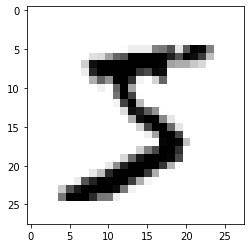

0


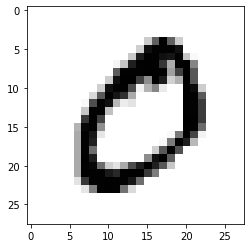

In [8]:
for i in range(2):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

Normalization

In [9]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))

255
255
1.0
1.0


In [10]:
data_count = train_x.shape[0]
data_size = train_x.shape[1]*train_x.shape[2]
train_x = train_x.reshape((data_count, data_size))

data_count = test_x.shape[0]
test_x = test_x.reshape((data_count, data_size))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


#모델 준비

In [12]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 1.0224 - acc: 0.6769
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3649 - acc: 0.8975
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2972 - acc: 0.9156
Epoch 4/5
60000/60000 [==============================] -

In [13]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.2500 - acc: 0.9279
loss= 0.24996049018353222
acc= 0.9279


[[1.6726382e-03 1.4439524e-08 4.8927846e-05 ... 9.8337263e-01
  4.5343027e-06 4.8616446e-05]
 [1.4163124e-03 1.3529589e-05 9.9171925e-01 ... 8.0151363e-12
  2.2046968e-06 3.2326049e-13]
 [1.1819618e-04 9.8189294e-01 7.5024455e-03 ... 1.7580017e-03
  2.1599594e-03 1.4142621e-05]
 ...
 [5.3557710e-07 5.2114796e-08 3.5270758e-05 ... 8.3691186e-05
  9.5910707e-04 1.0935562e-02]
 [3.5732261e-05 1.2755416e-05 1.9245837e-05 ... 1.1954486e-08
  8.1502544e-03 2.8914480e-08]
 [1.3583631e-05 2.4722015e-08 1.1958680e-05 ... 1.5771206e-11
  3.1325362e-09 3.6928396e-09]]
[7 2 1 ... 4 5 6]
7


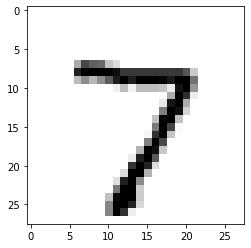

2


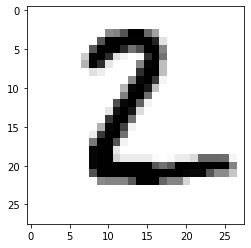

1


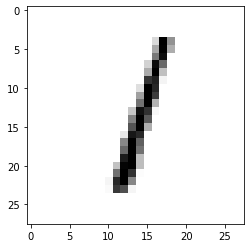

0


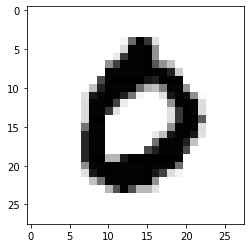

In [14]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(raw_test_y[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

#전체 코드

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.9507 - acc: 0.6851
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3843 - acc: 0.8879
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3189 - acc: 0.9069
Epoch 4/5
60000/60000 [==============================] -

#DNN Classification Template

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255

#(None,28,28)의 train_x는 그대로 사용, 모델의 처음에 Flatten() 레이어를 두어 입력 모양을 변경
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))#ADD
#model.add(Dense(10, activation-'relu', input_shape=(28*28,))) #COMMENT OUT
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.9338 - acc: 0.6873
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4184 - acc: 0.8791
Epoch 3/5
60000/60000 [==

#Normalization test

0~255 값으로 학습 실행

In [20]:
#Data 준비

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255

#모델
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
print("elapsed : {}".format(time.time() - start_time))

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 3.0471 - acc: 0.1124
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 2.2535 - acc: 0.1387
Epoch 3/5
60000/60000 [==

0~1 사이로 Normalization

In [21]:
#Data 준비

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255

#모델
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
print("elapsed : {}".format(time.time() - start_time))

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8692 - acc: 0.7350
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3617 - acc: 0.8978
Epoch 3/5
60000/60000 [==

-1~1로 Normalization

In [22]:
#Data 준비

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/127.5 - 1
test_x = test_x/127.5 - 1

#모델
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
print("elapsed : {}".format(time.time() - start_time))

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 1.7792 - acc: 0.3451
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 1.3118 - acc: 0.5363
Epoch 3/5
60000/60000 [==

-255~255로 Normalization

In [23]:
#Data 준비

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x*2 - 255
test_x = test_x*2 - 255

#모델
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
print("elapsed : {}".format(time.time() - start_time))

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 3.1857 - acc: 0.1844
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.9233 - acc: 0.2795
Epoch 3/5
60000/60000 [=